In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import mode
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid line wrapping
pd.set_option('display.max_colwidth', None)  # Display full content in each cell

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# File path
file_path = "/content/drive/MyDrive/Research/Heart-Failure/Data/dat.csv"
file_path_md = "/content/drive/MyDrive/Research/Heart-Failure/Data/dat_md.csv"
# Load CSV into DataFrame
data = pd.read_csv(file_path)
meds = pd.read_csv(file_path_md)

In [4]:
data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,respiratory.support.,oxygen.inhalation,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,mitral.valve.EMS,mitral.valve.AMS,EA,tricuspid.valve.return.velocity,tricuspid.valve.return.pressure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,time.of.death..days.from.admission.,re.admission.time..days.from.admission.,return.to.emergency.department.within.6.months,time.to.emergency.department.within.6.months,creatinine.enzymatic.method,urea,uric.acid,glomerular.filtration.rate,cystatin,white.blood.cell,monocyte.ratio,monocyte.count,red.blood.cell,coefficient.of.variation.of.red.blood.cell.distribution.width,standard.deviation.of.red.blood.cell.distribution.width,mean.corpuscular.volume,hematocrit,lymphocyte.count,mean.hemoglobin.volume,mean.hemoglobin.concentration,mean.platelet.volume,basophil.ratio,basophil.count,eosinophil.ratio,eosinophil.count,hemoglobin,platelet,platelet.distribution.width,platelet.hematocrit,neutrophil.ratio,neutrophil.count,D.dimer,international.normalized.ratio,activated.partial.thromboplastin.time,thrombin.time,prothrombin.activity,prothrombin.time.ratio,fibrinogen,high.sensitivity.troponin,myoglobin,carbon.dioxide.binding.capacity,calcium,potassium,chloride,sodium,Inorganic.Phosphorus,serum.magnesium,creatine.kinase.isoenzyme.to.creatine.kinase,hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase,hydroxybutyrate.dehydrogenase,glutamic.oxaloacetic.transaminase,creatine.kinase,creatine.kinase.isoenzyme,lactate.dehydrogenase,brain.natriuretic.peptide,high.sensitivity.protein,nucleotidase,fucosidase,albumin,white.globulin.ratio,cholinesterase,glutamyltranspeptidase,glutamic.pyruvic.transaminase,glutamic.oxaliplatin,indirect.bilirubin,alkaline.phosphatase,globulin,direct.bilirubin,total.bilirubin,total.bile.acid,total.protein,erythrocyte.sedimentation.rate,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,homocysteine,apolipoprotein.A,apolipoprotein.B,lipoprotein,pH,standard.residual.base,standard.bicarbonate,partial.pressure.of.carbon.dioxide,total.carbon.dioxide,methemoglobin,hematocrit.blood.gas,reduced.hemoglobin,potassium.ion,chloride.ion,sodium.ion,glucose.blood.gas,lactate,measured.residual.base,measured.bicarbonate,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,0.0,1,0.0,0,0,0,0,0.0,0,2.0,NonTypeII,Clear,4,5,6,NaN,OxygenTherapy,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alive,0,0,0,0,0,0,NaN,NaN,0.0,NaN,108.3,12.55,685.0,58.57,1.32,9.43,0.085,0.80,4.09,15.0,50.3,94.5,0.387,1.51,32.0,338.0,14.0,0.006,0.05,0.002,0.02,131.0,102.0,16.6,0.142,0.746,7.05,1.19,1.39,33.4,17.0,60.3,1.37,3.84,0.094,NaN,21.6,2.28,5.59,101.9,134.6,NaN,NaN,0.22,0.63,185.0,81.0,43.0,9.6,294.0,1500.17,7.6,3.5,20.5,38.1,1.6,NaN,83.0,65.0,1.02,11.4,61.0,23.8,6.9,18.3,4.9,61.9,NaN,3.46,1.90,2.69,0.84,NaN,NaN,NaN,NaN,7.44,-3.0,22.7,32.0,22.2,0.3,37.0,3.4,5.63,103.0,136.4,5.8,2.5,-2.1,21.

# Selecting features with missing value:

Choosing only those features with less that 30 missing values to make sure we are 1.5% margin of error while imputing these missing values as this is a healthcare dataset.

In [5]:
# Filter features with missing values and their counts
missing_features = data.isnull().sum()
missing_features = missing_features[missing_features > 0]

# Create a DataFrame with feature names and missing value counts
missing_features_df = pd.DataFrame({
    'Feature': missing_features.index,
    'Missing_Values': missing_features.values
})

In [6]:
filtered_features = missing_features_df[missing_features_df['Missing_Values'] < 30].sort_values(by='Missing_Values', ascending=False)

In [7]:
selected_missing_value_features = list(filtered_features['Feature'])

In [8]:
no_missing_value_features = data.columns[~data.isnull().any()].tolist()

In [9]:
selected_features = no_missing_value_features + selected_missing_value_features
print('Total Features Selected :',len(selected_features))

Total Features Selected : 82


In [10]:
filtered_data = data[selected_features].copy()
filtered_data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,diabetes,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,AIDS,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,oxygen.inhalation,fio2,acute.renal.failure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,GCS,dischargeDay,ageCat,mean.corpuscular.volume,hemoglobin,mean.hemoglobin.volume,hematocrit,occupation,neutrophil.count,neutrophil.ratio,platelet,eosinophil.count,eosinophil.ratio,basophil.count,basophil.ratio,mean.hemoglobin.concentration,lymphocyte.count,red.blood.cell,monocyte.count,monocyte.ratio,white.blood.cell,uric.acid,urea,creatinine.enzymatic.method,carbon.dioxide.binding.capacity,chloride,potassium,calcium,sodium,CCI.score,moderate.to.severe.chronic.kidney.disease,peptic.ulcer.disease,liver.disease,return.to.emergency.department.within.6.months
0,1,857781,Home,Cardiology,NonEmergency,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,1,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,11,"(69,79]",94.5,131.0,32.0,0.387,UrbanResident,7.05,0.746,102.0,0.02,0.002,0.05,0.006,338.0,1.51,4.09,0.80,0.085,9.43,685.0,12.55,108.3,21.6,101.9,5.59,2.28,134.6,2.0,0.0,0.0,0.0,0.0
1,2,743087,Home,Cardiology,NonEmergency,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303,Both,III,I,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,8,"(69,79]",88.6,114.0,28.9,0.349,UrbanResident,3.73,0.702,123.0,0.05,0.009,0.01,0.002,326.0,1.18,3.93,0.35,0.066,5.32,170.0,4.29,62.0,26.5,105.6,3.62,2.28,144.0,0.0,0.0,0.0,0.0,0.0
2,3,866418,Home,Cardiology,NonEmergency,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453,Both,II,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(59,69]",96.4,144.0,32.6,0.427,farmer,11.54,0.887,169.0,0.02,0.002,0.03,0.002,339.0,0.75,4.43,0.67,0.051,13.01,567.0,15.99,185.1,21.6,107.0,4.15,2.56,142.2,0.0,0.0,0.0,0.0,0.0
3,4,775928,Home,Cardiology,Emergency,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349,Both,III,II,0,0,0,0,0,1,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,1,0,1,0,1,15,11,"(69,79]",102.2,94.0,34.7,0.277,UrbanResident,1.22,0.559,35.0,0.06,0.028,0.00,0.000,339.0,0.71,2.71,0.19,0.087,2.18,635.0,8.16,104.8,21.1,101.6,3.76,2.35,136.3,2.0,1.0,0.0,0.0,1.0
4,5,810128,Home,Cardiology,NonEmergency,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715,Both,III,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(69,79]",90.0,120.0,28.6,0.378,UrbanResident,4.28,0.697,104.0,0.05,0.008,0.01,0.002,317.0,1.27,4.20,0.53,0.086,6.14,432.0,6.86,83.9,22.8,104.3,3.94,2.42,136.6,0.0,0.0,0.0,0.0,0.0


# Filling Missing Values

**Criteria:**
1. Symmetric numerical data: Impute with the mean.
2. Skewed numerical data: Impute with the median.
3. Categorical data: Impute with the mode.

In [11]:
data_missing_values = data[selected_missing_value_features]
data_missing_values.head()

,mean.corpuscular.volume,hemoglobin,mean.hemoglobin.volume,hematocrit,occupation,neutrophil.count,neutrophil.ratio,platelet,eosinophil.count,eosinophil.ratio,basophil.count,basophil.ratio,mean.hemoglobin.concentration,lymphocyte.count,red.blood.cell,monocyte.count,monocyte.ratio,white.blood.cell,uric.acid,urea,creatinine.enzymatic.method,carbon.dioxide.binding.capacity,chloride,potassium,calcium,sodium,CCI.score,moderate.to.severe.chronic.kidney.disease,peptic.ulcer.disease,liver.disease,return.to.emergency.department.within.6.months
0,94.5,131.0,32.0,0.387,UrbanResident,7.05,0.746,102.0,0.02,0.002,0.05,0.006,338.0,1.51,4.09,0.80,0.085,9.43,685.0,12.55,108.3,21.6,101.9,5.59,2.28,134.6,2.0,0.0,0.0,0.0,0.0
1,88.6,114.0,28.9,0.349,UrbanResident,3.73,0.702,123.0,0.05,0.009,0.01,0.002,326.0,1.18,3.93,0.35,0.066,5.32,170.0,4.29,62.0,26.5,105.6,3.62,2.28,144.0,0.0,0.0,0.0,0.0,0.0
2,96.4,144.0,32.6,0.427,farmer,11.54,0.887,169.0,0.02,0.002,0.03,0.002,339.0,0.75,4.43,0.67,0.051,13.01,567.0,15.99,185.1,21.6,107.0,4.15,2.56,142.2,0.0,0.0,0.0,0.0,0.0
3,102.2,94.0,34.7,0.277,UrbanResident,1.22,0.559,35.0,0.06,0.028,0.00,0.000,339.0,0.71,2.71,0.19,0.087,2.18,635.0,8.16,104.8,21.1,101.6,3.76,2.35,136.3,2.0,1.0,0.0,0.0,1.0
4,90.0,120.0,28.6,0.378,UrbanResident,4.28,0.697,104.0,0.05,0.008,0.01,0.002,317.0,1.27,4.20,0.53,0.086,6.14,432.0,6.86,83.9,22.8,104.3,3.94,2.42,136.6,0.0,0.0,0.0,0.0,0.0


In [12]:
categorical_features = data_missing_values.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = data_missing_values.select_dtypes(include=['number']).columns.tolist()

### 1. Handling Missing Numeric Values

In [13]:
# Calculate skewness using scipy
skewness = {col: skew(data_missing_values[col].dropna()) for col in numeric_features}

# Convert skewness to DataFrame for visualization
skewness_df = pd.DataFrame(list(skewness.items()), columns=['Feature', 'Skewness']).sort_values(by='Skewness', ascending=False)

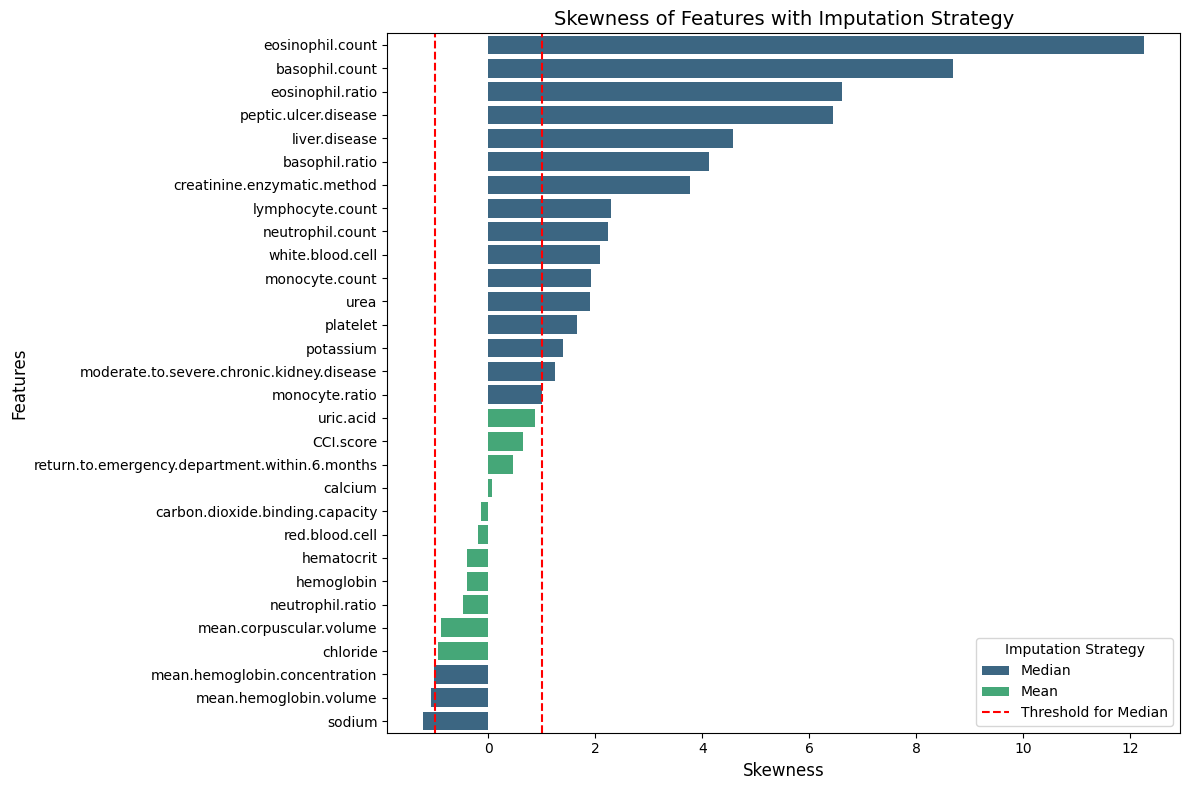

In [14]:
# Determine the imputation strategy based on skewness
skewness_df['Imputation'] = skewness_df['Skewness'].apply(
    lambda x: 'Median' if abs(x) > 1 else 'Mean'
)

# Plot skewness with imputation strategy
plt.figure(figsize=(12, 8))
sns.barplot(y='Feature', x='Skewness', hue='Imputation', data=skewness_df, dodge=False, palette='viridis')
plt.axvline(1, color='red', linestyle='--', label='Threshold for Median')
plt.axvline(-1, color='red', linestyle='--')

plt.title('Skewness of Features with Imputation Strategy', fontsize=14)
plt.xlabel('Skewness', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.legend(title='Imputation Strategy')
plt.tight_layout()
plt.show()

In [15]:
# Filling Missing Values - Numeric

if isinstance(filtered_data, pd.DataFrame):
    for index, row in skewness_df.iterrows():
        feature = row['Feature']
        imputation = row['Imputation']
        if feature in filtered_data.columns:  # Ensure the feature exists in the DataFrame
            if imputation == 'Median':
                filtered_data[feature].fillna(filtered_data[feature].median(), inplace=True)
            elif imputation == 'Mean':
                filtered_data[feature].fillna(filtered_data[feature].mean(), inplace=True)


### 2. Handling Missing Categorical Values

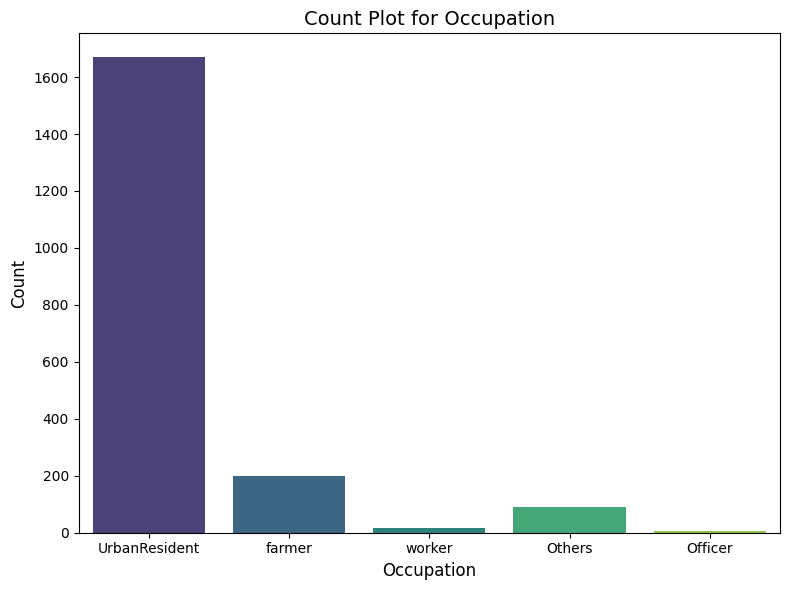

In [16]:
# Count plot for 'occupation'
plt.figure(figsize=(8, 6))
sns.countplot(x=filtered_data['occupation'], palette='viridis')
plt.title('Count Plot for Occupation', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# Filling Missing Values - Categorical

# Calculate mode using pandas
occupation_mode = filtered_data['occupation'].mode()[0]

# Fill missing values with mode
filtered_data['occupation'].fillna(occupation_mode, inplace=True)

### All the missing values have been filled

In [18]:
filtered_data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,diabetes,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,AIDS,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,oxygen.inhalation,fio2,acute.renal.failure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,GCS,dischargeDay,ageCat,mean.corpuscular.volume,hemoglobin,mean.hemoglobin.volume,hematocrit,occupation,neutrophil.count,neutrophil.ratio,platelet,eosinophil.count,eosinophil.ratio,basophil.count,basophil.ratio,mean.hemoglobin.concentration,lymphocyte.count,red.blood.cell,monocyte.count,monocyte.ratio,white.blood.cell,uric.acid,urea,creatinine.enzymatic.method,carbon.dioxide.binding.capacity,chloride,potassium,calcium,sodium,CCI.score,moderate.to.severe.chronic.kidney.disease,peptic.ulcer.disease,liver.disease,return.to.emergency.department.within.6.months
0,1,857781,Home,Cardiology,NonEmergency,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,1,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,11,"(69,79]",94.5,131.0,32.0,0.387,UrbanResident,7.05,0.746,102.0,0.02,0.002,0.05,0.006,338.0,1.51,4.09,0.80,0.085,9.43,685.0,12.55,108.3,21.6,101.9,5.59,2.28,134.6,2.0,0.0,0.0,0.0,0.0
1,2,743087,Home,Cardiology,NonEmergency,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303,Both,III,I,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,8,"(69,79]",88.6,114.0,28.9,0.349,UrbanResident,3.73,0.702,123.0,0.05,0.009,0.01,0.002,326.0,1.18,3.93,0.35,0.066,5.32,170.0,4.29,62.0,26.5,105.6,3.62,2.28,144.0,0.0,0.0,0.0,0.0,0.0
2,3,866418,Home,Cardiology,NonEmergency,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453,Both,II,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(59,69]",96.4,144.0,32.6,0.427,farmer,11.54,0.887,169.0,0.02,0.002,0.03,0.002,339.0,0.75,4.43,0.67,0.051,13.01,567.0,15.99,185.1,21.6,107.0,4.15,2.56,142.2,0.0,0.0,0.0,0.0,0.0
3,4,775928,Home,Cardiology,Emergency,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349,Both,III,II,0,0,0,0,0,1,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,1,0,1,0,1,15,11,"(69,79]",102.2,94.0,34.7,0.277,UrbanResident,1.22,0.559,35.0,0.06,0.028,0.00,0.000,339.0,0.71,2.71,0.19,0.087,2.18,635.0,8.16,104.8,21.1,101.6,3.76,2.35,136.3,2.0,1.0,0.0,0.0,1.0
4,5,810128,Home,Cardiology,NonEmergency,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715,Both,III,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(69,79]",90.0,120.0,28.6,0.378,UrbanResident,4.28,0.697,104.0,0.05,0.008,0.01,0.002,317.0,1.27,4.20,0.53,0.086,6.14,432.0,6.86,83.9,22.8,104.3,3.94,2.42,136.6,0.0,0.0,0.0,0.0,0.0


In [19]:
meds.head()

,Unnamed: 0,inpatient.number,Drug_name
0,1,857781,sulfotanshinone sodium injection
1,2,857781,Furosemide tablet
2,3,857781,Enoxaparin Sodium injection
3,4,857781,Meglumine Adenosine Cyclophosphate for injection
4,5,857781,Furosemide injection


In [20]:
file_path = '/content/drive/MyDrive/Research/Heart-Failure/Data/Filtered_Data.csv'

# Export the DataFrame to a CSV file
filtered_data.to_csv(file_path, index=False)